In [1]:
%pylab inline
import math

Populating the interactive namespace from numpy and matplotlib


In [2]:
# allandok
scu = 5.333*10**(-5) # m, skalaegyseg

d = 6*10**(-3) # m
ro_o = 875 # kg/m^3 olaj surusege
ro_l = 1.29 # kg/m^3 levego surusege

eta_0 = 1.708*10**(-5) #Pa*s
C = 113 # K
T_0 = 273 # K
g = 9.80665 # m/s^2

K = 8.26*10**(-3) # Pa*m

# kiserlet korulmenyei
T = 296 # K
p = 1016*100 # Pa, 1016hPa

# levego viszkozitasa korrigalva
eta = eta_0*sqrt(T/T_0)*(1+C/T_0)/(1+C/T)

# mert adatok
# tererosseg nelkul
t_0 = [] # sec
s_0 = [] # beosztas
# tererosseg mellett
U = [] # V, tererosseg
t_E = []  # sec
s_E = []  # beosztas

# mert adatok feltoltese
adatok = loadtxt("csepp_adatok.txt", skiprows=1)

for sor in adatok:
    s_0.append(sor[0])
    t_0.append(sor[1])
    U.append(sor[2])
    s_E.append(sor[3])
    t_E.append(sor[4])

#skala atszamitasa m-be
s_0 = [s*scu*10 for s in s_0] # 10 egyseg egy nagy egyseg
s_E = [s*scu*10 for s in s_E]

# sebessegek...
v_0 = [s/t for s, t in zip(s_0, t_0)]
v_E = [s/t for s, t in zip(s_E, t_E)]

# sugarak kiszamitasa
def sugaratSzamol (v) :
    return sqrt(9*eta*v/ (2*(ro_o - ro_l)*g))
r = [sugaratSzamol(v) for v in v_0]

#kiiratas
print("n\tsugár\tt_esés\tt_elmelk.");
print("------------------------------");
for i in range(len(r)):
    print("%d.\t%.3f\t%.2f\t%.2f"% (i, r[i]*10**6, t_0[i], t_E[i])); # mikrometerben kiirt meret

n	sugár	t_esés	t_elmelk.
------------------------------
0.	0.742	37.06	16.73
1.	0.327	95.47	12.75
2.	0.344	128.90	9.68
3.	0.485	65.10	22.31
4.	0.508	59.19	25.94
5.	0.498	61.62	26.22
6.	0.517	47.72	25.43
7.	0.864	20.50	7.68
8.	0.494	62.75	19.25
9.	0.603	42.00	14.82
10.	0.508	39.48	18.63
11.	0.505	60.08	25.91
12.	0.795	24.20	27.40
13.	0.678	33.25	56.90
14.	0.770	34.35	10.81
15.	0.701	31.10	15.32
16.	0.695	31.62	21.17
17.	0.542	52.13	23.96
18.	0.542	52.03	22.53
19.	0.542	52.06	23.52
20.	0.757	35.54	9.28
21.	0.702	31.06	15.86
22.	0.501	60.94	15.34
23.	0.505	59.97	26.32
24.	0.588	44.22	8.82
25.	0.441	78.68	14.59


$$\frac{4}{3}\pi r^3(\rho_o-\rho_l)g=6\pi\eta r v_0\frac{1}{1+\frac{K}{pr}}$$
$$r^2(\rho_o-\rho_l)g+r(\rho_o-\rho_l)\frac{gK}{p}-\frac{9}{2}\eta v_0=0$$

In [3]:
# toltes meghatarozasa
a=(ro_o-ro_l)*g #masodfoku egyenlet egyutthatoi
b=(ro_o-ro_l)*g*K/p
c=[0]*len(r)
q=[0]*len(r)
r_korr=[0]*len(r) #korrigalom a sugarat is

for i in range(len(r)):
    # korrigalt surlodasi ero
    F_surl_korr = 6*pi*eta*r[i]*v_E[i]/(1+K/(p*r[i]))
    #masodfoku egyenlet 3. egyutthatoja
    c[i]=-9/2*eta*v_0[i]
    #korrigalt sugar
    r_korr[i]=(-b+sqrt(b**2-4*a*c[i]))/(2*a)
    # surlodasi ero masodik korrekcioja
    F_surl_korr2=6*pi*eta*r_korr[i]*v_E[i]/(1+K/(p*r_korr[i]))
    # felhajtoero es gravitacios ero
    F_fel_grav = 4/3*pi*r_korr[i]**3*(ro_o-ro_l)*g
    
    q[i] = (d/U[i])*(F_surl_korr2+F_fel_grav)

#kiiratas
print("n\ttöltés\tt_esés\tt_elmelk.");
print("------------------------------");
for i in range(len(q)):
    print("%d.\t%.3f\t%.2f\t%.2f"% (i+1, q[i]*10**19, t_0[i], t_E[i])); # 10^19C-ban kiirt toltes

n	töltés	t_esés	t_elmelk.
------------------------------
1.	-1.794	37.06	16.73
2.	2.022	95.47	12.75
3.	2.309	128.90	9.68
4.	1.858	65.10	22.31
5.	1.792	59.19	25.94
6.	1.717	61.62	26.22
7.	1.872	47.72	25.43
8.	8.806	20.50	7.68
9.	1.718	62.75	19.25
10.	3.680	42.00	14.82
11.	1.851	39.48	18.63
12.	1.774	60.08	25.91
13.	3.488	24.20	27.40
14.	1.775	33.25	56.90
15.	7.038	34.35	10.81
16.	3.774	31.10	15.32
17.	3.637	31.62	21.17
18.	1.735	52.13	23.96
19.	1.807	52.03	22.53
20.	1.753	52.06	23.52
21.	7.665	35.54	9.28
22.	3.692	31.06	15.86
23.	2.111	60.94	15.34
24.	1.759	59.97	26.32
25.	5.493	44.22	8.82
26.	1.793	78.68	14.59


In [4]:
el=linspace(1.6*10**(-19),1.9*10**(-19),301)
##lusta modon szemmel megneztem, hogy kb. hanyszorosa az elemi toltesnek (vagy mivel az itt meg ismeretlen, ezert az itteni
#legkisebb erteknek)
N=[-1,1,1,1,1,1,1,5,1,2,1,1,2,1,4,2,2,1,1,1,4,2,1,1,3,1]

In [5]:
f=[0]*len(el)
for i in range (len(el)):
    for j in range(len(N)):
        f[i]=sum(sin(pi*q[j]*N[j]/el[i])**2)

In [6]:
kis=f[0]
pos=0
for i in range(len(f)):
    if f[i]<kis:
        kis=f[i]
        pos=i
        
print("Az elemi toltes nagysaga",el[pos],"C")

Az elemi toltes nagysaga 1.7929999999999998e-19 C


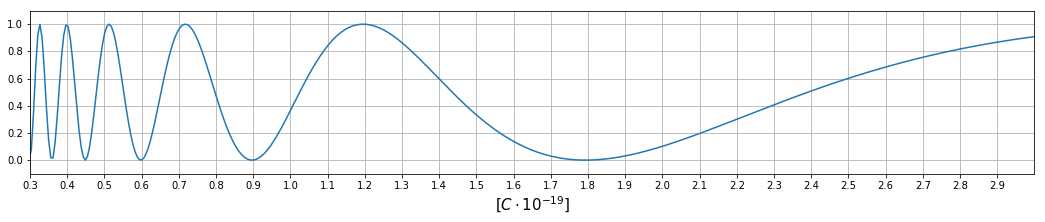

In [7]:
xx=linspace(10**(-20),3*10**(-19), 500)
fx=[0]*len(xx)
for i in range (len(xx)):
    for j in range(len(N)):
        fx[i]=sum(sin(pi*q[j]*N[j]/xx[i])**2)

figsize(18, 3)
ylim(-0.1, 1.1)
xticks(arange(30)/10)
xlim(0.3, 3)
xlabel(r'[$C\cdot10^{-19}$]', fontsize = 15)
grid(True)
plot(xx*10**(19), fx);

savefig('mill_scaled.png')

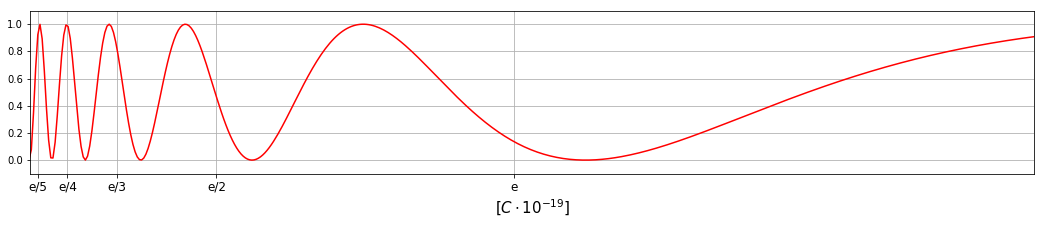

In [8]:
figsize(18, 3)
#xlim(10**(-20),3*10**(-19))
ylim(-0.1, 1.1)
ue = 1.602176620810
e_mertek = [ue/i for i in range(1, 6)]
e_label = ["e"]
e_label += ["e/" +str(i) for i in range(2, 6)]
xticks(e_mertek, e_label, fontsize = 12)
xlim(0.3, 3)
xlabel(r'[$C\cdot10^{-19}$]', fontsize = 15)
grid(True)
plot(xx*10**(19), fx, 'r');

savefig('mill_charge.png')